1. Estimar integral definida

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

#funcaoo para calcular a integral definida de f(x) de a ate b usando soma de Riemann pela esquerda
def soma_Riemann_Esquerda (f, a, b, n): #f é a funcao a ser integrada, a é o limite inferior, b é o limite superior, n é o número de retangulos para aproximar a area da curvaa
    dx = (b - a) / n #largura de cada retangulo
    x = np.linspace(a, b - dx, n) #gera n pontos igualmente espaçados de a ate b - dx
    return np.sum(f(x) * dx)

#funcaoo para calcular a integral definida de f(x) de a ate b usando soma de Riemann pela direita
def soma_Riemann_Direita(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a + dx, b, n)
    return np.sum(f(x) * dx)

#funcaoo para calcular a integral definida de f(x) de a ate b usando soma de Riemann pele metodo do ponto medio
def soma_Riemann_PM(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a + dx/2, b - dx/2, n)
    return np.sum(f(x) * dx)

#funcaoo para calcular a integral definida de f(x) de a ate b usando soma de Riemann pelo metodo dos trapezoides
def soma_Riemann_Trapezoides(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (dx / 2) * np.sum(y[:-1] + y[1:])    

def f(x): #define a funcao a ser integrada
    return np.exp(-x**2)

#valor conhecido da integral
valor_real = 0.746824

#intervalo da integração
a, b = 0, 1

#valores de n 
n_valores = [100, 1000, 10000]
erros_esq, erros_dir, erros_pm, erros_trap = [], [], [], []

#erro absoluto
for n in n_valores:
    erros_esq.append(abs(soma_Riemann_Esquerda(f, a, b, n) - valor_real))
    erros_dir.append(abs(soma_Riemann_Direita(f, a, b, n) - valor_real))
    erros_pm.append(abs(soma_Riemann_PM(f, a, b, n) - valor_real))
    erros_trap.append(abs(soma_Riemann_Trapezoides(f, a, b, n) - valor_real))

#print da estimativa das integrais e do erro absoluto para cada n
print("resultados e erros absolutos para cada metodo:\n")
print("{:<10} {:<25} {:<20} {:<20}".format("n", "Metodo", "Resultado", "Erro Absoluto"))

for n in n_valores:
    resultado_esq = soma_Riemann_Esquerda(f, a, b, n)
    resultado_dir = soma_Riemann_Direita(f, a, b, n)
    resultado_pm = soma_Riemann_PM(f, a, b, n)
    resultado_trap = soma_Riemann_Trapezoides(f, a, b, n)

    print("{:<10} {:<25} {:<20.10f} {:<20.10f}".format(n, "Riemann Esquerda", resultado_esq, erro_esq))
    print("{:<10} {:<25} {:<20.10f} {:<20.10f}".format(n, "Riemann Direita", resultado_dir, erro_dir))
    print("{:<10} {:<25} {:<20.10f} {:<20.10f}".format(n, "Ponto Medio", resultado_pm, erro_pm))
    print("{:<10} {:<25} {:<20.10f} {:<20.10f}".format(n, "Trapezoides", resultado_trap, erro_trap))




resultados e erros absolutos para cada metodo:

n          Metodo                    Resultado            Erro Absoluto       
100        Riemann Esquerda          0.7499786043         0.0000317382        
100        Riemann Direita           0.7436573987         0.0000314738        
100        Ponto Medio               0.7468271985         0.0000001331        
100        Trapezoides               0.7468180015         0.0000001322        
1000       Riemann Esquerda          0.7471401318         0.0000317382        
1000       Riemann Direita           0.7465080112         0.0000314738        
1000       Ponto Medio               0.7468241635         0.0000001331        
1000       Trapezoides               0.7468240715         0.0000001322        
10000      Riemann Esquerda          0.7468557382         0.0000317382        
10000      Riemann Direita           0.7467925262         0.0000314738        
10000      Ponto Medio               0.7468241331         0.0000001331        
1000

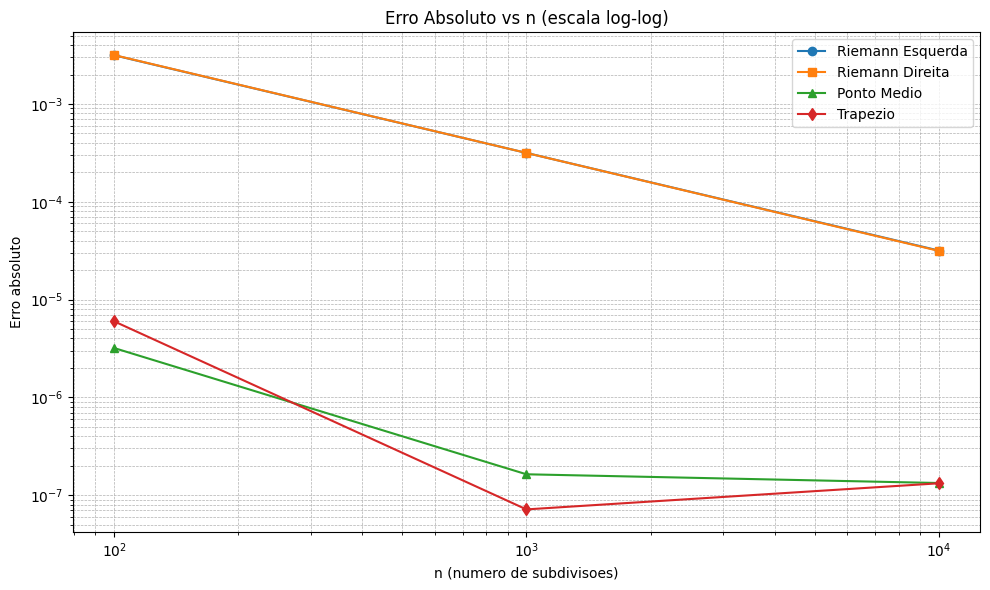

In [34]:
#plotando grafico log-log

plt.figure(figsize=(10, 6))
plt.loglog(n_valores, erros_esq, label='Riemann Esquerda', marker='o')
plt.loglog(n_valores, erros_dir, label='Riemann Direita', marker='s')
plt.loglog(n_valores, erros_pm, label='Ponto Medio', marker='^')
plt.loglog(n_valores, erros_trap, label='Trapezio', marker='d')

plt.title("Erro Absoluto vs n (escala log-log)")
plt.xlabel("n (numero de subdivisoes)")
plt.ylabel("Erro absoluto")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()